In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


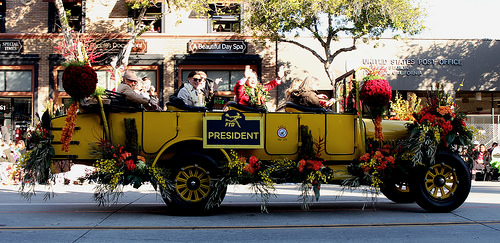

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

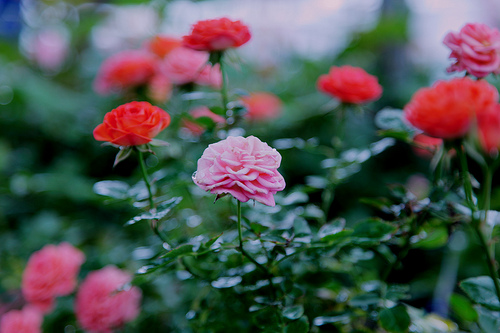

In [5]:
PIL.Image.open(str(roses[1]))

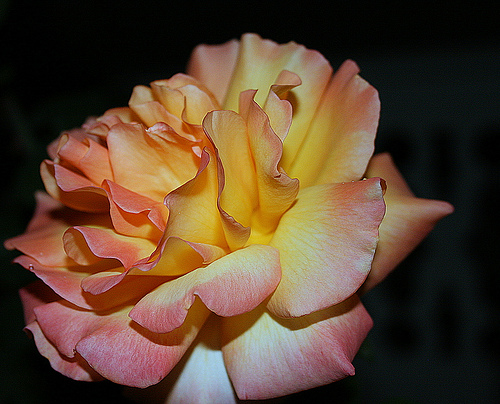

In [6]:
PIL.Image.open(str(roses[100]))

In [7]:
# Add tulips
tulips = list(data_dir.glob('tulips/*'))

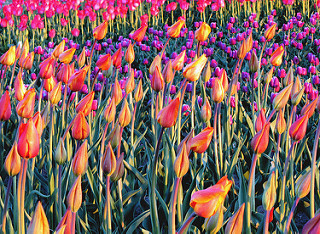

In [8]:
PIL.Image.open(str(tulips[0]))

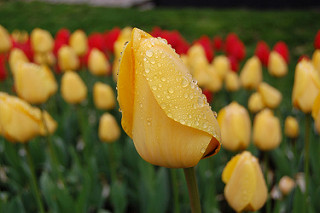

In [9]:
PIL.Image.open(str(tulips[100]))

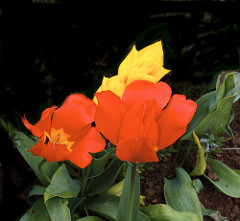

In [10]:
PIL.Image.open(str(tulips[110]))

# Create a Dataset

In [11]:
batch_size = 40
image_height = 180
image_width = 180

In [12]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [14]:
class_names = training_data.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


These are the first 9 images in the dataset


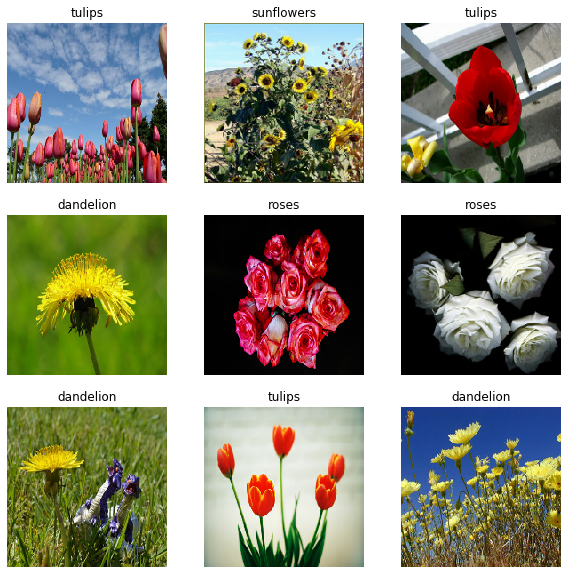

In [21]:
print('These are the first 9 images in the dataset')

plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    


In [25]:
for image_batch, labels_batch in training_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(40, 180, 180, 3)
(40,)


In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

NameError: name 'train_ds' is not defined

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)